<br>
# **Seq 2 Seq**
시퀀스 2 시퀀스 실습

<br>
## **1 Image Array to matplotlib**
이미지 <--> numpy Array 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
image =[[1,1,1,1,1,1,1,1,1,1,1,1,0.1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,0.2,1,1,1,0.3,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,0.1,1,1,1,0.3,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,0,1,1,1,2,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
dx, dy = 0.05, 0.05
x ,  y = np.arange(-3.0, 3.0, dx), np.arange(-3.0, 3.0, dy)
X ,  Y = np.meshgrid(x, y)
xmin, xmax, ymin, ymax = np.amin(x), np.amax(x), np.amin(y), np.amax(y)
extent = xmin, xmax, ymin, ymax
image  = np.array(image); print(image.shape)

plt.figure(frameon=False)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest', extent=extent)
plt.show()

(14, 14)


<Figure size 640x480 with 1 Axes>

<br>
## **2 번역**
http://dalpo0814.tistory.com/45

LSTM 은 긴 번역에 대해선 성능이 좋지 않은것에 대한 대안으로써 보완한 모델이다

In [2]:
from imageio import imread, imsave
import numpy as np
import tensorflow as tf
img  = imread('./data/코끼리_tinted.jpg')
img1 = imread('./data/햄스터_tinted.jpg')
img2 = imread('./data/코끼리11.jpg')
img3 = imread('./data/코끼리22.jpg')
img4 = imread('./data/코끼리33.jpg')
img5 = imread('./data/코끼리44.jpg')
data = [img, img1,img2,img3,img4]
data = np.array(data)
char_arr = [c for c in 'SEP가아나기다코구끼라리와마오리바햄스사터뒤에물통 ']
num_dic  = {n: i for i, n in enumerate(char_arr)}
dic_len  = len(num_dic)+1
max_len  = 10 # 입력과 출력의 최대 글자 수

/home/erdos/Jupyter/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def conv2d(inputs, filters, kernel_size = (3, 3), strides = (1, 1),
           activation = tf.nn.relu, use_bias = True, name = None):

    return tf.layers.conv2d(inputs = inputs, filters = filters,
                            kernel_size = kernel_size, strides = strides,
                            padding = 'same', activation = activation,
                            use_bias = use_bias, name = name)

# 2D Max Pooling layer
def max_pool2d(inputs, pool_size=(2, 2), strides=(2, 2), name = None):
    return tf.layers.max_pooling2d(inputs = inputs, pool_size = pool_size,
                                   strides = strides, padding = 'same', name = name)
# Fully-connected layer
def dense(inputs, units, activation = tf.tanh, use_bias = True, name = None):
    return tf.layers.dense(inputs = inputs, units = units, activation = activation,
                           use_bias = use_bias, name = name)

In [4]:
# Build the VGG16 net
def build_vgg16(images):
    conv1_1_feats = conv2d(images,        64,  name='conv1_1')
    conv1_2_feats = conv2d(conv1_1_feats, 64,  name='conv1_2')
    pool1_feats   = max_pool2d(conv1_2_feats,  name='pool1')
    
    conv2_1_feats = conv2d(pool1_feats,   128, name='conv2_1')
    conv2_2_feats = conv2d(conv2_1_feats, 128, name='conv2_2')
    pool2_feats   = max_pool2d(conv2_2_feats,  name='pool2')
    
    conv3_1_feats = conv2d(pool2_feats,   256, name='conv3_1')
    conv3_2_feats = conv2d(conv3_1_feats, 256, name='conv3_2')
    conv3_3_feats = conv2d(conv3_2_feats, 256, name='conv3_3')
    pool3_feats   = max_pool2d(conv3_3_feats,  name='pool3')
    
    conv4_1_feats = conv2d(pool3_feats,   256, name='conv4_1')
    conv4_2_feats = conv2d(conv4_1_feats, 256, name='conv4_2')
    conv4_3_feats = conv2d(conv4_2_feats, 256, name='conv4_3')
    pool4_feats   = max_pool2d(conv4_3_feats,  name='pool4')
    
    conv5_1_feats = conv2d(pool4_feats,   256, name='conv5_1')
    conv5_2_feats = conv2d(conv5_1_feats, 256, name='conv5_2')
    conv5_3_feats = conv2d(conv5_2_feats, 256, name='conv5_3') # 14*14*256 로 출력
    
    reshaped_conv5_3_feats = tf.reshape(conv5_3_feats, [-1, 196*256] )
    den = dense(reshaped_conv5_3_feats,9192)
    den = dense(den, 4096)
    den = dense(den, 4096)
    return den

In [5]:
# 사진의 크기 224*224
images = tf.placeholder(dtype = tf.float32, shape = [None,224,224,3])
ima    = build_vgg16(images)
# 입력 Text 는 필요없어서 비워둔다
label = [['','코끼리와 오리'],['','햄스터와 물통'],['','코끼리'],['','코끼리'],['','코끼리']]

def make_batch(seq_data):
    output_batch, target_batch = [], []
    for seq in seq_data:
        # 디코더 셀의 입력값. 시작을 나타내는 S 심볼을 맨 앞에 붙여준다.
        output = [num_dic[n] for n in ('S' + seq[1])]
        # 학습을 위해 비교할 디코더 셀의 출력값. 끝나는 것을 알려주기 위해 마지막에 E 를 붙인다.
        target = [num_dic[n] for n in (seq[1] + 'E')]
        # 아래는 글자의 최대수보다 낮으면 패딩으로 채워주고 크면 최대만큼 잘라냄
        if len(output) <= max_len:
            for i in range(max_len - len(output)):
                output.append(2)
        else:
            output = output[:max_len]

        if len(target) <= max_len:
            for i in range(max_len - len(target)):
                target.append(2)
        else:
            target = target[:max_len]
        output_batch.append(np.eye(dic_len)[output])
        target_batch.append(target)
    return  output_batch, target_batch

In [6]:
learning_rate = 0.0001
n_hidden      = 4096 # CNN출력의 사이즈와 맞춘다
total_epoch   = 201
n_class   = n_input = dic_len

# [batch size, time steps]
dec_input = tf.placeholder(tf.float32, [None, None, n_input])
targets   = tf.placeholder(tf.int64, [None, None])

# Seq2Seq 모델에서는 인코더 셀의 최종 상태값을 디코더 셀의 초기 상태값으로 넣어주지만 
# 이 모델에서는 CNN에서 나온 출력값을 초기상태값으로 넣어준다.
with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)
    outputs, dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input,
                                            initial_state=ima,# 초기상태값
                                            dtype=tf.float32)

In [7]:
model = tf.layers.dense(outputs, n_class, activation=None)##단어 갯수만큼 출력을 맞춰줌
cost  = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(
                logits = model, labels = targets))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
sess      = tf.Session()
sess.run(tf.global_variables_initializer())
output_batch, target_batch = make_batch(label)

In [8]:
def translate(imge):
    seq_data = ['',''] # 처음 데이터로 시작을 뜻하는 S만들어가면 되기때문에 둘다 비워둠
    output_batch, target_batch = make_batch([seq_data]) # S만 들어가있는 데이터
    imge = [imge]
    # 결과가 [batch size, time step, input] 으로 나오기 때문에,
    # 2번째 차원인 input 차원을 argmax 로 취해 가장 확률이 높은 글자를 예측 값으로 만든다.
    prediction = tf.argmax(model, 2)
    result = sess.run(prediction,
                      feed_dict={images :imge,
                                 dec_input: output_batch})#여기서 S 다음에 올 글자 예측

    # 원래는 디코더 입력 데이터를 다 패딩처리해서 한꺼번에 넣어주었는데
    # 여기서는 다음단어를 예측하여 그다음 LSTM에 넣어준다
    for i in range(max_len):
        if result[0][i]==1: # 끝을 뜻하는 E가 번호로 1로 표현되기 때문에 1이나오면 종료
            break
        elif i == 0: # result에 처음 데이터는 S다음 데이터이기 때문에 다음 output으로 S를 뜻하는 0과 re 를 같이 넣어줌
            re=result[0][i]
            output = [0,re]
            output_batch = []
            output_batch.append(np.eye(dic_len)[output])
            output = output[:2]
            result = sess.run(prediction,
                              feed_dict={images :imge,
                                 dec_input: output_batch})
        # 계속해서 result의 출력을 아웃풋에 추가시켜 단어를 예측한다 
        else: 
            re = result[0][i]
            output.append(re)
            output_batch = []
            output_batch.append(np.eye(dic_len)[output])
            output = output[:i+2]
            result = sess.run(prediction,
                              feed_dict={images :imge,
                                 dec_input: output_batch})
        if i == max_len-1: # 최대길이면 그냥 출력
            break

    # 결과 값인 숫자의 인덱스에 해당하는 글자를 가져와 글자 배열을 만든다.
    decoded = [char_arr[i] for i in result[0]]

    # 출력의 끝을 의미하는 'E' 이후의 글자들을 제거하고 문자열로 만든다.
    if 'E' in decoded:
        end = decoded.index('E')
        translated = ''.join(decoded[:end])
    else:##E가 없으면 모두출력
        translated = ''.join(decoded)

    return translated

Epoch 1 , cost = 3.483474
img1 -> 코끼리
img2 -> 코끼리
img5 -> 코끼리
Epoch 26 , cost = 0.692378
img1 -> 코끼리
img2 -> 코끼리
img5 -> 코끼리
Epoch 51 , cost = 0.263815
img1 -> 햄스터와 물통
img2 -> 햄스터와 물통
img5 -> 햄스터와 물통
Epoch 76 , cost = 0.188956
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 햄스터와 물통
Epoch 101 , cost = 0.030983
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 코끼리
Epoch 126 , cost = 0.001756
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 코끼리
Epoch 151 , cost = 0.000451
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 코끼리
Epoch 176 , cost = 0.000453
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 코끼리
Epoch 201 , cost = 0.000305
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 코끼리
Epoch 226 , cost = 0.000219
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 코끼리
Epoch 251 , cost = 0.000399
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 코끼리
Epoch 276 , cost = 0.000158
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 코끼리
Epoch 301 , cost = 0.000102
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 코끼리
Epoch 326 , cost = 0.000153
img1 -> 햄스터와 물통
img2 -> 코끼리
img5 -> 코끼리
Epoch 351 , cost = 0.000120
img1 -> 햄스터와 물통
img2 

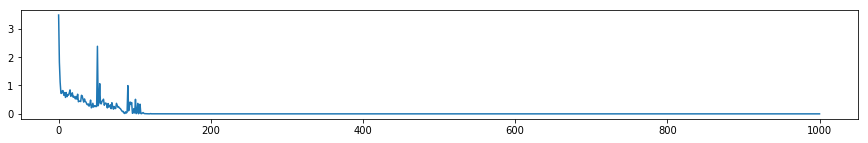

In [9]:
cost_data = []
for epoch in range(total_epoch):
    _, loss = sess.run([optimizer, cost],
                       feed_dict={images :data,
                                  dec_input: output_batch,
                                  targets: target_batch})
    cost_data.append(loss)
    if epoch % 25 == 0: # 훈련 잘되었는지 10번마다 확인
        print('Epoch {} , cost = {:.6f}'.format(epoch + 1, loss + 0))
        print('img1 ->', translate(img1))
        print('img2 ->', translate(img2))
        print('img5 ->', translate(img5))

import pandas as pd
cost_data = pd.Series(cost_data)
cost_data.plot(figsize=(15,2))

<br>
## **3 Attention 보완모델**
어텐션.py

In [10]:
from imageio import imread, imsave
import numpy as np
import tensorflow as tf
img  = imread('./data/코끼리_tinted.jpg')
img1 = imread('./data/햄스터_tinted.jpg')
img2 = imread('./data/코끼리11.jpg')
img3 = imread('./data/코끼리22.jpg')
img4 = imread('./data/코끼리33.jpg')
img5 = imread('./data/코끼리44.jpg')
data = [img, img1,img2,img3,img4]
data = np.array(data)
char_arr = [c for c in 'SEP가아나기다코구끼라리와마오리바햄스사터뒤에물통 ']
num_dic  = {n: i for i, n in enumerate(char_arr)}
dic_len  = len(num_dic)+1
max_len  = 10 #입력과 출력의 최대 글자 수

In [11]:
# Attention Mechanism
def attend(contexts, output):
    reshaped_contexts = tf.reshape(contexts, [-1, 256])
    # use 1 fc layer to attend
    logits1 =tf.layers.dense(reshaped_contexts,
                             units = 1,
                             activation = None,
                             use_bias = False,
                             name = 'fc_a')
    print(logits1)
    logits1 = tf.reshape(logits1, [-1, 196])
    logits2 = tf.layers.dense(output,
                              units = 196,
                              activation = None,
                              use_bias = False,
                              name = 'fc_b')
    a = tf.shape(logits1)
    b = tf.shape(logits2)
    logit = logits1 + logits2
    logit = tf.nn.softmax(logit)
    return logit

In [12]:
def conv2d(inputs, filters, kernel_size=(3, 3), strides=(1, 1),
           activation=tf.nn.relu, use_bias=True, name=None):
    return tf.layers.conv2d(inputs=inputs, filters=filters,
                            kernel_size=kernel_size, strides=strides,
                            padding='same', activation=activation,
                            use_bias=use_bias, name=name)

In [13]:
# 2D Max Pooling layer.
def max_pool2d(inputs, pool_size=(2, 2), strides=(2, 2), name=None):
    return tf.layers.max_pooling2d(inputs=inputs, pool_size=pool_size, 
                                   strides=strides, padding='same', name=name)

# Fully-connected layer
def dense(inputs, units, activation=tf.tanh, use_bias=True, name=None):
    return tf.layers.dense(inputs=inputs, units=units, 
                           activation=activation, use_bias=use_bias, name=name)

In [14]:
# Build the VGG16 net.
# 사진의 크기 224*224
# 5th Layer 에서 14*14*256 으로 출력
def build_vgg16(images):
    conv1_1_feats = conv2d(images, 64, name='conv1_1')
    conv1_2_feats = conv2d(conv1_1_feats, 64, name='conv1_2')
    pool1_feats   = max_pool2d(conv1_2_feats, name='pool1')
    
    conv2_1_feats = conv2d(pool1_feats, 128, name='conv2_1')
    conv2_2_feats = conv2d(conv2_1_feats, 128, name='conv2_2')
    pool2_feats   = max_pool2d(conv2_2_feats, name='pool2')
    
    conv3_1_feats = conv2d(pool2_feats, 256, name='conv3_1')
    conv3_2_feats = conv2d(conv3_1_feats, 256, name='conv3_2')
    conv3_3_feats = conv2d(conv3_2_feats, 256, name='conv3_3')
    pool3_feats = max_pool2d(conv3_3_feats, name='pool3')

    conv4_1_feats = conv2d(pool3_feats, 256, name='conv4_1')
    conv4_2_feats = conv2d(conv4_1_feats, 256, name='conv4_2')
    conv4_3_feats = conv2d(conv4_2_feats, 256, name='conv4_3')
    pool4_feats = max_pool2d(conv4_3_feats, name='pool4')

    conv5_1_feats = conv2d(pool4_feats, 256, name='conv5_1')
    conv5_2_feats = conv2d(conv5_1_feats, 256, name='conv5_2')
    conv5_3_feats = conv2d(conv5_2_feats, 256, name='conv5_3') 

    reshaped_conv5_3_feats = tf.reshape(conv5_3_feats, [-1, 196, 256])
    return reshaped_conv5_3_feats

In [15]:
def make_batch(seq_data):
    output_batch, target_batch = [], []
    for seq in seq_data:
        # 디코더 셀의 입력값. 시작을 나타내는 S 심볼을 맨 앞에 붙여준다.
        output = [num_dic[n] for n in ('S' + seq[1])]
        # 학습을 위해 비교할 디코더 셀의 출력값. 끝나는 것을 알려주기 위해 마지막에 E 를 붙인다.
        target = [num_dic[n] for n in (seq[1] + 'E')]
        # 아래는 글자의 최대수보다 낮으면 패딩으로 채워주고 크면 최대만큼 잘라냄
        if len(output) <= max_len:
            for i in range(max_len - len(output)):
                output.append(2)
        else: output = output[:max_len]

        if len(target) <= max_len:
            for i in range(max_len - len(target)):
                target.append(2)
        else: target = target[:max_len]
        output_batch.append(np.eye(dic_len)[output])
        target_batch.append(target)
    return  output_batch, target_batch

In [16]:
data        = np.array(data)
images      = tf.placeholder(dtype=tf.float32, shape=[None,224,224,3])
ima         = build_vgg16(images)
label       = [['','코끼리와 오리'],['','햄스터와 물통'],['','코끼리'],['','코끼리'],['','코끼리']] # 입력데이터는 필요없기에 비워둠.
learning_rate = 0.0001
n_hidden    = 4096 #CNN출력의 사이즈와 맞춰줌
total_epoch = 1001
n_class     = n_input = dic_len
dec_input   = tf.placeholder(tf.float32, [None, None, n_input])
# [batch size, time steps]
targets     = tf.placeholder(tf.int64, [None, None])

ValueError: Variable conv1_1/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-3-c9029df50583>", line 7, in conv2d
    use_bias = use_bias, name = name)
  File "<ipython-input-4-a7d3ed2d735e>", line 3, in build_vgg16
    conv1_1_feats = conv2d(images,        64,  name='conv1_1')
  File "<ipython-input-5-ae19bf044654>", line 3, in <module>
    ima    = build_vgg16(images)


In [ ]:
# seq2seq 의 Decoder 실행 
# Seq2Seq 모델에서는 인코더 셀의 최종 상태값을 디코더 셀의 초기 상태값으로 넣어주지만 이 모델에서는 CNN에서 나온 출력값을 초기상태값으로 넣어준다
with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)
    outputs, dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input,
                                            initial_state=ima, # 초기상태값
                                            dtype=tf.float32)

model = tf.layers.dense(outputs, n_class, activation=None) # 단어 갯수만큼 출력을 맞춰줌
cost  = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model, labels=targets))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
sess  = tf.Session()
sess.run(tf.global_variables_initializer())
output_batch, target_batch = make_batch(label)

In [ ]:
# 처음 데이터로 시작을 뜻하는 S를 만들어가면 되기때문에 둘 다 비워둔다 
def translate(imge):
    seq_data = ['','']
    output_batch, target_batch = make_batch([seq_data])##S만 들어가있는 데이터
    imge = [imge]
    # 결과가 [batch size, time step, input] 으로 나오기 때문에,
    # 2번째 차원인 input 차원을 argmax 로 취해 가장 확률이 높은 글자를 예측 값으로 만든다.
    prediction = tf.argmax(model, 2)
    #여기서 S 다음에 올 글자 예측
    result = sess.run(prediction, feed_dict={images :imge, dec_input: output_batch})
    # 원래는 디코더 입력 데이터를 다 패딩처리해서 한꺼번에 넣어주었는데
    # 여기서는 다음단어를 예측하여 그다음 LSTM에 넣어줌
    for i in range(max_len):
        if result[0][i]==1: # 끝을 뜻하는 E가 번호로 1로 표현되기 때문에 1이나오면 종료
            break
        # result에 처음 데이터는 S다음 데이터이기 때문에 다음 output으로 S를 뜻하는 0과 re 를 같이 넣어줌
        elif i == 0: 
            re     = result[0][i]
            output = [0,re]
            output_batch = []
            output_batch.append(np.eye(dic_len)[output])
            output = output[:2]
            result = sess.run(prediction, feed_dict={images :imge, dec_input: output_batch})
        # 계속해서 result의 출력을 아웃풋에 추가시켜 단어를 예측한다
        else: 
            re = result[0][i]
            output.append(re)
            output_batch = []
            output_batch.append(np.eye(dic_len)[output])
            output = output[:i+2]
            result = sess.run(prediction, feed_dict={images :imge, dec_input: output_batch})
        if i == max_len - 1: # 최대길이면 그냥 출력
            break

    # 결과 값인 숫자의 인덱스에 해당하는 글자를 가져와 글자 배열을 만든다.
    decoded = [char_arr[i] for i in result[0]]
    # 출력의 끝을 의미하는 'E' 이후의 글자들을 제거하고 문자열로 만든다.
    if 'E' in decoded:
        end = decoded.index('E')
        translated = ''.join(decoded[:end])
    else: translated = ''.join(decoded) # E가 없으면 모두출력
    return translated

In [ ]:
for epoch in range(total_epoch):
    _, loss = sess.run([optimizer, cost],
                       feed_dict={images :data,
                                  dec_input: output_batch,
                                  targets: target_batch})
    print('Epoch:', '%04d' % (epoch + 1),
          'cost =', '{:.6f}'.format(loss))
    if epoch % 10 == 0: # 훈련잘되었는지 10번마다 확인
        print('img ->', translate(img2))
        print('img ->', translate(img1))
        print('img ->', translate(img5))

<br>
## **4 확인모델**

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from imageio import imread, imsave
img  = imread('./data/코끼리_tinted.jpg')
img1 = imread('./data/햄스터_tinted.jpg')
img2 = imread('./data/코끼리11.jpg')
img3 = imread('./data/코끼리22.jpg')
img4 = imread('./data/코끼리33.jpg')
img5 = imread('./data/코끼리44.jpg')
data = [img, img1,img2,img3,img4]
data = np.array(data)
char_arr = [c for c in 'SEP가아나기다코구끼라리와마오리바햄스사터뒤에물통 ']
num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len = len(num_dic)+1
max_len = 10 #입력과 출력의 최대 글자 수

In [18]:
# Attention Mechanism
def attend(contexts, output):
    reshaped_contexts = tf.reshape(contexts, [-1, 256])
    # use 1 fc layer to attend
    logits1 =tf.layers.dense(reshaped_contexts, units=1, 
                             activation=None, use_bias=False, 
                             name='fc_a', reuse=tf.AUTO_REUSE)
    logits1 = tf.reshape(logits1, [-1, 196])
    logits2 = tf.layers.dense(output,units = 196,
                              activation = None, use_bias=False,
                              name = 'fc_b',reuse = tf.AUTO_REUSE)
    logit = logits1 + logits2
    logit = tf.nn.softmax(logit)
    return logit

In [19]:
def conv2d(inputs, filters, kernel_size=(3, 3), strides=(1, 1),
           activation = tf.nn.relu, use_bias=True, name=None):
    return tf.layers.conv2d(inputs = inputs, filters = filters, 
                            kernel_size = kernel_size, strides = strides,
                            padding = 'same', activation = activation,
                            use_bias = use_bias, name = name)
# """ 2D Max Pooling layer. """
def max_pool2d(inputs, pool_size=(2, 2), strides=(2, 2), name=None):  
    return tf.layers.max_pooling2d(inputs=inputs, pool_size=pool_size,
                                   strides=strides, padding='same', name=name)
# Fully-connected layer.
def dense(inputs, units, activation=tf.tanh, use_bias=True, name=None):
    return tf.layers.dense(inputs=inputs, units=units, activation=activation,
                           use_bias=use_bias, name=name)

In [20]:
# 사진의 크기 224*224
# Build the VGG16 net.
def build_vgg16(images):
    conv1_1_feats = conv2d(images, 64, name='conv1_1')
    conv1_2_feats = conv2d(conv1_1_feats, 64, name='conv1_2')
    pool1_feats = max_pool2d(conv1_2_feats, name='pool1')

    conv2_1_feats =conv2d(pool1_feats, 128, name='conv2_1')
    conv2_2_feats = conv2d(conv2_1_feats, 128, name='conv2_2')
    pool2_feats = max_pool2d(conv2_2_feats, name='pool2')

    conv3_1_feats = conv2d(pool2_feats, 256, name='conv3_1')
    conv3_2_feats = conv2d(conv3_1_feats, 256, name='conv3_2')
    conv3_3_feats = conv2d(conv3_2_feats, 256, name='conv3_3')
    pool3_feats = max_pool2d(conv3_3_feats, name='pool3')

    conv4_1_feats = conv2d(pool3_feats, 256, name='conv4_1')
    conv4_2_feats = conv2d(conv4_1_feats, 256, name='conv4_2')
    conv4_3_feats = conv2d(conv4_2_feats, 256, name='conv4_3')
    pool4_feats = max_pool2d(conv4_3_feats, name='pool4')

    conv5_1_feats = conv2d(pool4_feats, 256, name='conv5_1')
    conv5_2_feats = conv2d(conv5_1_feats, 256, name='conv5_2')
    conv5_3_feats = conv2d(conv5_2_feats, 256, name='conv5_3')#14*14*256 으로 출력
    reshaped_conv5_3_feats = tf.reshape(conv5_3_feats, [-1, 196, 256])
    context_mean = tf.reduce_mean(reshaped_conv5_3_feats, axis=1)
    memory = dense(context_mean, units=4096, activation=None, name='fc_a')
    output = dense(context_mean, units=4096, activation=None, name='fc_b')
    return reshaped_conv5_3_feats, memory, output

In [21]:
def make_batch(seq_data):
    output_batch, target_batch = [], []
    for seq in seq_data:
        # 디코더 셀의 입력값. 시작을 나타내는 S 심볼을 맨 앞에 붙여준다.
        output = [num_dic[n] for n in ('S' + seq[1])]
        # 학습을 위해 비교할 디코더 셀의 출력값. 끝나는 것을 알려주기 위해 마지막에 E 를 붙인다.
        target = [num_dic[n] for n in (seq[1] + 'E')]
        ##아래는 글자의 최대수보다 낮으면 패딩으로 채워주고 크면 최대만큼 잘라냄
        if len(output) <= max_len:
            for i in range(max_len - len(output)):
                output.append(2)
        else:
            output = output[:max_len]

        if len(target) <= max_len:
            for i in range(max_len - len(target)):
                target.append(2)
        else:
            target = target[:max_len]
        output_batch.append(np.eye(dic_len)[output])
        target_batch.append(target)
    return  output_batch, target_batch

In [22]:
images = tf.placeholder( dtype=tf.float32, shape=[None,224,224,3])
ima, state, out = build_vgg16(images)
label = [['','코끼리와 오리'],['','햄스터와 물통'],['','코끼리'],['','코끼리'],['','코끼리']]##입력데이터는 필요없기에 비워둠.
learning_rate = 0.0001
n_hidden = 4096 #CNN출력의 사이즈와 맞춰줌
total_epoch = 1001

n_class =dic_len
n_input =dic_len
output_batch, target_batch = make_batch(label)


dec_input = tf.placeholder(tf.float32, [None, None, n_input])
# [batch size, time steps]

targets = tf.placeholder(tf.int64, [None, None])
output_batch = np.array(output_batch)

ValueError: Variable conv1_1/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-3-c9029df50583>", line 7, in conv2d
    use_bias = use_bias, name = name)
  File "<ipython-input-4-a7d3ed2d735e>", line 3, in build_vgg16
    conv1_1_feats = conv2d(images,        64,  name='conv1_1')
  File "<ipython-input-5-ae19bf044654>", line 3, in <module>
    ima    = build_vgg16(images)


In [ ]:
with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)

    '''Seq2Seq 모델에서는 인코더 셀의 최종 상태값을 디코더 셀의 초기 상태값으로 넣어주지만 이 모델에서는 CNN에서 나온 출력값을 초기상태값으로 넣어줌.'''

    predictions = []
    sente = []
    al = []
    for i in range(max_len):
        if i == 0:
            dec_inputa = dec_input[:,i,:]
            alpha=attend(ima,out)
            context = tf.reduce_sum(ima * tf.expand_dims(alpha, 2), axis=1)
            a = tf.nn.softmax(alpha)
            a = tf.reshape(a, [14, 14])
            al.append(a)
            current_input = tf.concat([context, dec_inputa], 1)
            outputs, dec_states = dec_cell(current_input, state)
            expanded_output = tf.concat([outputs, context, dec_inputa], axis=1)
            model = tf.layers.dense(expanded_output, n_class, activation=None)  ##단어 갯수만큼 출력을 맞춰줌
            probs = tf.nn.softmax(model)
            prediction = tf.argmax(model, 1)
            sente.append(model)
            predictions.append(prediction)

        else:
            dec_inputa = dec_input[:, i, :]
            alpha = attend(ima, outputs)
            context = tf.reduce_sum(ima * tf.expand_dims(alpha, 2), axis=1)

            a = tf.nn.softmax(alpha)
            a = tf.reshape(a, [14, 14])
            al.append(a)

            current_input = tf.concat([context, dec_inputa], 1)
            outputs, dec_states = dec_cell(current_input, dec_states)
            expanded_output = tf.concat([outputs, context, dec_inputa], axis=1)
            model = tf.layers.dense(expanded_output, n_class, activation=None)##단어 갯수만큼 출력을 맞춰줌
            probs = tf.nn.softmax(model)

            prediction = tf.argmax(model, 1)
            sente.append(model)
            predictions.append(prediction)

    predictions = tf.transpose(predictions)
    sente = tf.transpose(sente,(1,0,2))

In [ ]:
def translate(imge):
    seq_data = ['','']#처음 데이터로 시작을 뜻하는 S만들어가면 되기때문에 둘다 비워둠
    output_batch, target_batch = make_batch([seq_data])##S만 들어가있는 데이터
    imge = [imge]
    # 결과가 [batch size, time step, input] 으로 나오기 때문에,
    # 2번째 차원인 input 차원을 argmax 로 취해 가장 확률이 높은 글자를 예측 값으로 만든다.
    result = sess.run(predictions,
                      feed_dict={images :imge,
                                 dec_input: output_batch})#여기서 S 다음에 올 글자 예측

    # 원래는 디코더 입력 데이터를 다 패딩처리해서 한꺼번에 넣어주었는데
    # 여기서는 다음단어를 예측하여 그다음 LSTM에 넣어줌
    for i in range(max_len):
        if result[0][i]==1: # 끝을 뜻하는 E가 번호로 1로 표현되기 때문에 1이나오면 종료
            break
        elif i == 0:        # result에 처음 데이터는 S다음 데이터이기 때문에 다음 output으로 S를 뜻하는 0과 re 를 같이 넣어줌
            re=result[0][i]
            output = [0,re]
            pad = [2] * (8)
            output = output + pad
            output_batch = []
            output_batch.append(np.eye(dic_len)[output])
            result = sess.run(predictions,
                              feed_dict={images :imge,
                                 dec_input: output_batch})
        else: # 계속해서 result의 출력을 아웃풋에 추가시켜 단어를 예측
            re = result[0][i]
            output.append(re)
            pad = [2] * (max_len - (i + 2))
            output       = output + pad
            output_batch = []
            output_batch.append(np.eye(dic_len)[output])
            result = sess.run(predictions,
                              feed_dict={images :imge,
                                 dec_input: output_batch})
            alq = sess.run(al,feed_dict={images: imge,
                                         dec_input: output_batch})
        if i == max_len-1: # 최대길이면 그냥 출력
            break
            
    # 결과 값인 숫자의 인덱스에 해당하는 글자를 가져와 글자 배열을 만든다.
    decoded = [char_arr[i] for i in result[0]]
    # 출력의 끝을 의미하는 'E' 이후의 글자들을 제거하고 문자열로 만든다.
    if 'E' in decoded:
        end        = decoded.index('E')
        translated = ''.join(decoded[:end])
    else: # E가 없으면 모두출력
        translated = ''.join(decoded)
    return translated, alq

In [ ]:
cost = tf.reduce_mean(
            tf.nn.sparse_softmax_cross_entropy_with_logits(
                logits=sente, labels=targets))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
save_path = "./data/model.ckpt"
saver = tf.train.Saver()
saver.restore(sess,save_path=save_path)
c,v   = translate(img2)
print(c)

In [ ]:
import math
dx, dy = 0.001, 0.001
x = np.arange(-7, 7, dx)
y = np.arange(-7, 7, dy)
xmin, xmax, ymin, ymax = np.amin(x), np.amax(x), np.amin(y), np.amax(y)
extent = xmin, xmax, ymin, ymax
fig = plt.figure(frameon=False)
im1 = plt.imshow(v[2], cmap=plt.cm.gray, interpolation='nearest', extent=extent)
print(v)
plt.show()